In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pySPM

# Example on how to use pySPM

In [3]:
filename="CaptureFile.0_00019.spm"
ScanB = pySPM.Bruker(filename)
ScanB.list_channels()

Channels
	S [Height] "Height"
	S [] "Peak Force Error"


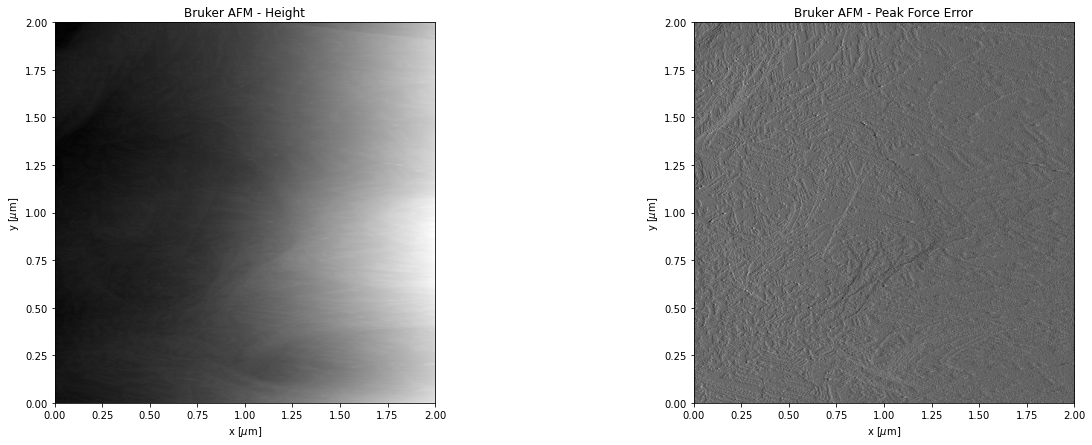

In [4]:
Height = ScanB.get_channel("Height")
PeakForceError = ScanB.get_channel("Peak Force Error")

fig, ax = plt.subplots(1, 2, figsize=(21, 7))
Height.show(ax=ax[0], cmap=None)
PeakForceError.show(ax=ax[1]);

In [5]:
Height.pixels

array([[0.00046156, 0.00046138, 0.00046371, ..., 0.00093793, 0.0009425 ,
        0.00094436],
       [0.00046203, 0.00046156, 0.00046212, ..., 0.0009438 , 0.00094641,
        0.00094548],
       [0.00046454, 0.00046361, 0.00046622, ..., 0.00093086, 0.0009344 ,
        0.00093784],
       ...,
       [0.0004244 , 0.00042031, 0.00042515, ..., 0.00086911, 0.0008733 ,
        0.00087442],
       [0.00041965, 0.00041872, 0.00041705, ..., 0.00086837, 0.00086958,
        0.00087144],
       [0.00042235, 0.00042403, 0.00042357, ..., 0.00086678, 0.00086809,
        0.00087172]])

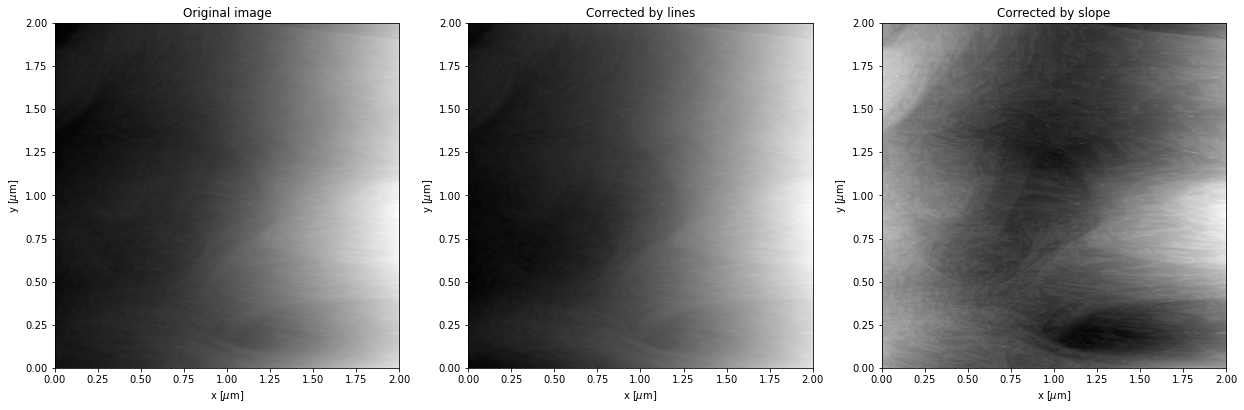

In [12]:
Height1 = Height.correct_lines(inline=False)
Height2 = Height.correct_plane(inline=False)

fig, ax = plt.subplots(1,3,figsize=(21, 7))
Height.show(ax=ax[0])
ax[0].set_title("Original image")
Height1.show(ax=ax[1])
ax[1].set_title("Corrected by lines")
Height2.show(ax=ax[2])
ax[2].set_title("Corrected by slope");

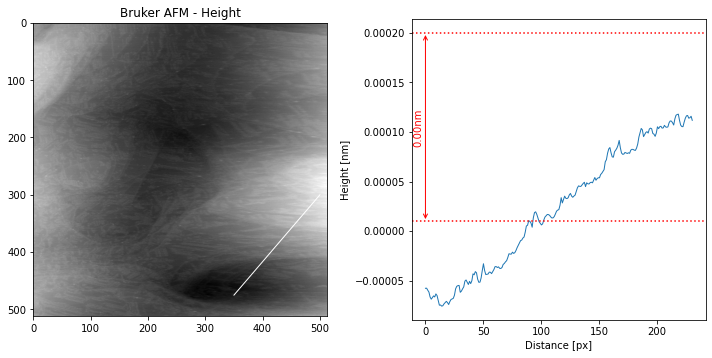

In [13]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

Height2.plot_profile(350,475,500,300,ax=ax[1],img=ax[0]) # the point are (x1,y1,x2,y2)
Height2.show(ax=ax[0],pixels=True) # if pixel=True the x and y are in pixels, otherwise they are in the unit of the file
pySPM.utils.Ydist(plt.gca(), 0.00001,0.0002, 0, unit=Height2.zscale) #the three number are: y_min, y_max, x_in_pixels
plt.tight_layout()

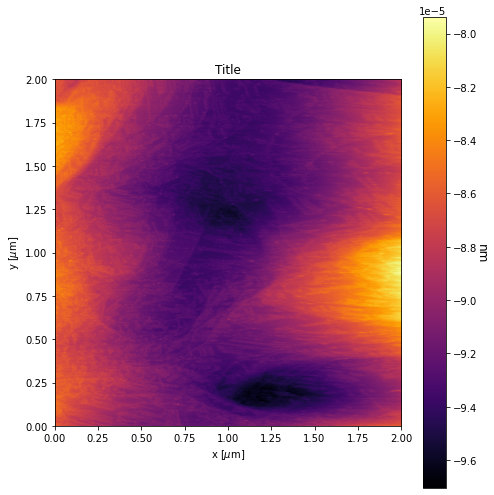

In [14]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
Height2.show(ax=ax, cmap="inferno", title="Title")
norm = mpl.colors.Normalize(vmin=np.min(Height2.pixels),vmax=np.min(Height2.pixels)) #sistemare min e max
sm = plt.cm.ScalarMappable(cmap="inferno", norm=norm)
cbar = plt.colorbar(sm)
cbar.set_label(Height2.zscale, rotation=270, labelpad=10, fontsize=12) #labelpad displaces the label on the left or right
plt.tight_layout()

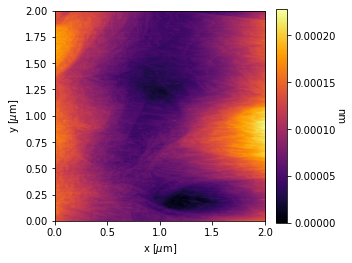

In [25]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
p=Height2.zero_min().show(ax=ax, cmap="inferno", title="") #plot the data so that the minimum of z is shifted to 0
cbar=plt.colorbar(p,fraction=0.046) #fraction and pad makes the colorbar as high as the y axis
cbar.set_label(label=Height2.zscale,rotation=270, labelpad=10) #labelpad displaces the label on the left or right
plt.tight_layout()

# Color maps

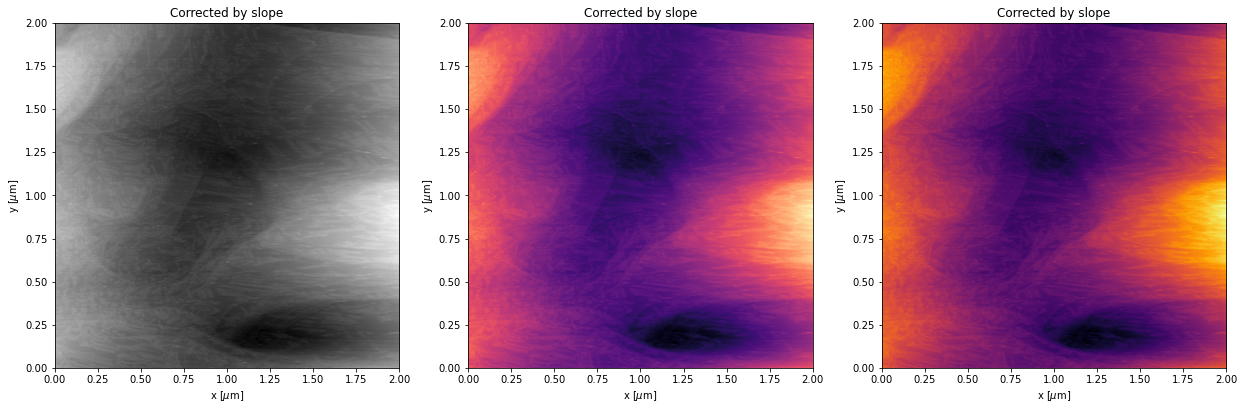

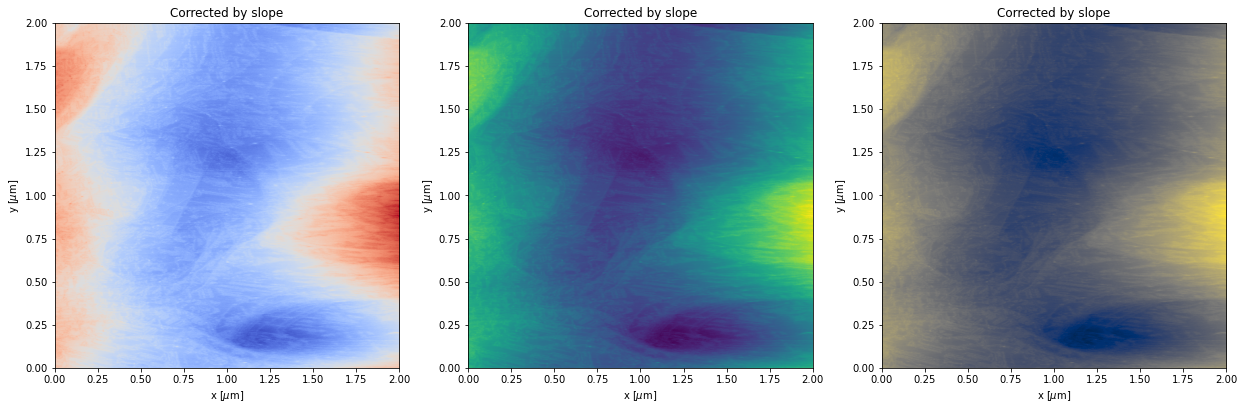

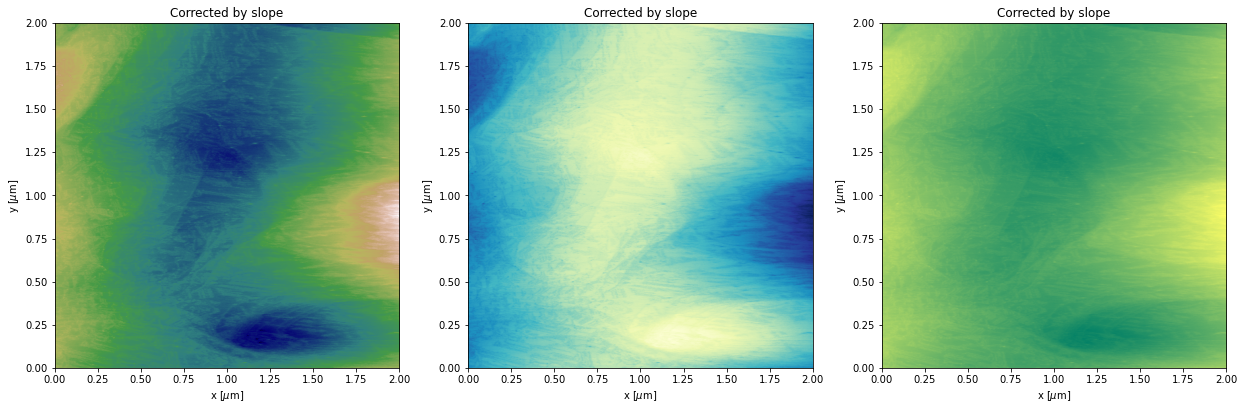

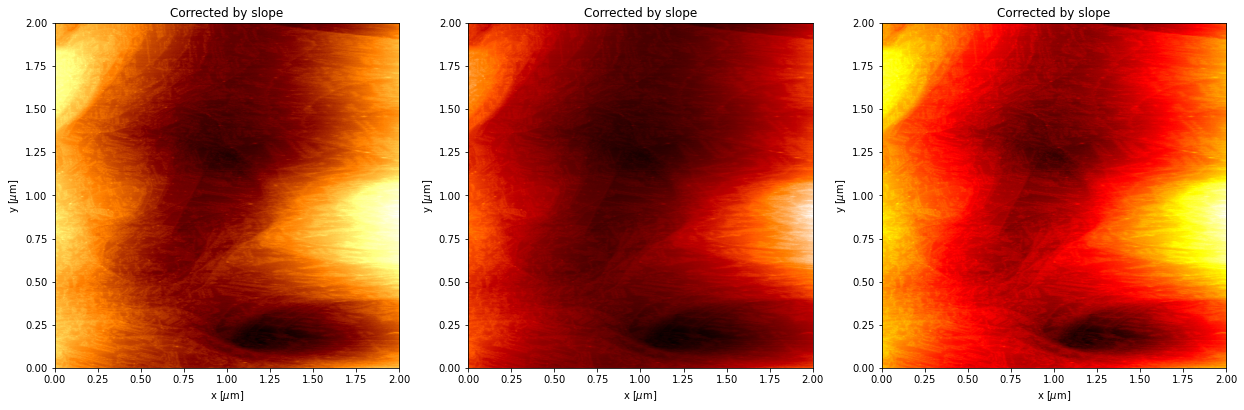

In [16]:
fig, ax = plt.subplots(1,3,figsize=(21, 7))
Height2.show(ax=ax[0])
ax[0].set_title("Corrected by slope")
Height2.show(ax=ax[1],cmap="magma")
ax[1].set_title("Corrected by slope")
Height2.show(ax=ax[2], cmap="inferno")
ax[2].set_title("Corrected by slope");

fig, ax = plt.subplots(1,3,figsize=(21, 7))
Height2.show(ax=ax[0], cmap="coolwarm")
ax[0].set_title("Corrected by slope")
Height2.show(ax=ax[1],cmap="viridis")
ax[1].set_title("Corrected by slope")
Height2.show(ax=ax[2],cmap="cividis")
ax[2].set_title("Corrected by slope");

fig, ax = plt.subplots(1,3,figsize=(21, 7))
Height2.show(ax=ax[0], cmap="gist_earth")
ax[0].set_title("Corrected by slope")
Height2.show(ax=ax[1],cmap="YlGnBu")
ax[1].set_title("Corrected by slope")
Height2.show(ax=ax[2],cmap="summer")
ax[2].set_title("Corrected by slope");

fig, ax = plt.subplots(1,3,figsize=(21, 7))
Height2.show(ax=ax[0], cmap="afmhot")
ax[0].set_title("Corrected by slope")
Height2.show(ax=ax[1],cmap="gist_heat")
ax[1].set_title("Corrected by slope")
Height2.show(ax=ax[2],cmap="hot")
ax[2].set_title("Corrected by slope");

# Test with a file that is known to work properly

In [17]:
filename="e17089.0_00001.spm"
ScanB = pySPM.Bruker(filename)
ScanB.list_channels()
Height=ScanB.get_channel()

Channels
	S [ZSensor] "Height Sensor"
	S [DeflectionError] "Deflection Error"
	S [AmplitudeActual] "Amplitude1"
	S [Phase] "Phase1"
	S [LockIn2AmpInput] "Amplitude2"
	S [LockIn2PhaseInput] "Phase2"


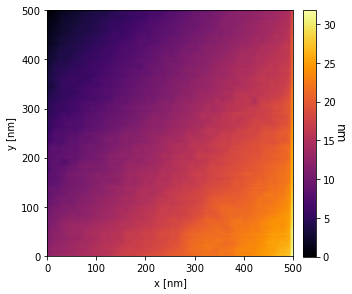

In [18]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
p=Height.zero_min().show(ax=ax, cmap="inferno", title="") #plot the data so that the minimum of z is shifted to 0
cbar=plt.colorbar(p,fraction=0.046, pad=0.04) #fraction and pad makes the colorbar as high as the y axis
cbar.set_label(label=Height.zscale,rotation=270, labelpad=10, fontsize=12) #labelpad displaces the label on the left or right
plt.tight_layout()

# Issue

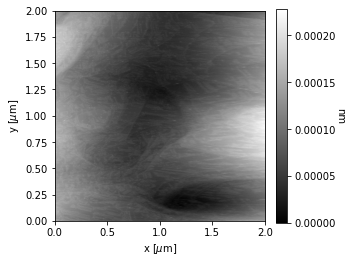

In [12]:
filename="CaptureFile.0_00019.spm"
ScanB = pySPM.Bruker(filename)
Height = ScanB.get_channel("Height")
Height2 = Height.correct_plane(inline=False)
fig, ax = plt.subplots(1,1, figsize=(5,5))
p=Height2.zero_min().show(ax=ax, title="") #plot the data so that the minimum of z is shifted to 0
cbar=plt.colorbar(p,fraction=0.046) #fraction and pad makes the colorbar as high as the y axis
cbar.set_label(label=Height2.zscale,rotation=270, labelpad=10) #labelpad displaces the label on the left or right
plt.tight_layout()
plt.savefig("Python Code Output.png")